5.1 퍼셉트론

In [1]:
#AND 연산
#딥러닝에서 중요한 연산 중 하나인 AND 연산
theta = 0
def AND(x1, x2):
  w1, w2, w0 = 0.5, 0.5, -0.7
  sum = w1*x1 + w2*x2 + w0
  if sum > theta :
    return 1
  else :
    return 0
  
print("AND(0,0) = ", AND(0,0))
print("AND(1,0) = ", AND(1,0))
print("AND(0,1) = ", AND(0,1))
print("AND(1,1) = ", AND(1,1))

AND(0,0) =  0
AND(1,0) =  0
AND(0,1) =  0
AND(1,1) =  1


In [2]:
#AND - numpy 배열로
import numpy as np
theta = 0
def AND(x1, x2):
  X = np.array([x1,x2])
  W = np.array([0.5, 0.5])
  w0 = -0.7
  sum = np.dot(W,X) + w0
  if sum > theta :
    return 1
  else :
    return 0
      
print("AND(0,0) = ", AND(0,0))
print("AND(1,0) = ", AND(1,0))
print("AND(0,1) = ", AND(0,1))
print("AND(1,1) = ", AND(1,1))

AND(0,0) =  0
AND(1,0) =  0
AND(0,1) =  0
AND(1,1) =  1


In [3]:
#OR 연산
#또다른 중요한 연산인 OR 연산
theta = 0
def OR(x1,x2):
    w1, w2, w0=0.5, 0.5, -0.2
    sum=w1*x1 + w2*x2 + w0
    if sum > theta :
        return 1
    else :
        return 0

print("OR(0,0) = ", OR(0,0))
print("OR(0,1) = ", OR(0,1))
print("OR(1,0) = ", OR(1,0))
print("OR(1,1) = ", OR(1,1))

OR(0,0) =  0
OR(0,1) =  1
OR(1,0) =  1
OR(1,1) =  1


In [4]:
#OR - numpy 이용
def OR(x1,x2):
    X = np.array([x1, x2])
    W = np.array([0.5, 0.5])
    b = -0.2
    sum = np.dot(W, X) + b
    if sum > theta :
        return 1
    else :
        return 0

print("OR(0,0) = ", OR(0,0))
print("OR(0,1) = ", OR(0,1))
print("OR(1,0) = ", OR(1,0))
print("OR(1,1) = ", OR(1,1))

OR(0,0) =  0
OR(0,1) =  1
OR(1,0) =  1
OR(1,1) =  1


In [5]:
#AND 논리연산 학습 알고리즘 구현

import numpy as np
from numpy import dot

training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
]

#분류를 실행하는 step 함수
def step(x):
  if x>=0:
    return 1
  else:
    return 0

#3에폭동안 가중치 업데이트 구현
w = np.array([0.4, 0.1, -0.3])
learning_rate = 0.05
epochs = 3

for epoch in range(epochs):
  for i in range(len(training_data)):
      x, target = training_data[i]      
      weighted_sum = dot(w, x)
    #실제값-계산값으로 오차 구현
      error = target - step(weighted_sum)   
    #학습률에 오차를 곱해서 가중치 업데이트
      w += learning_rate * error * x
      print('epoch={}, {}-th data, weights={}'.format(epoch,i+1,w))
  print("")



epoch=0, 1-th data, weights=[ 0.4  0.1 -0.3]
epoch=0, 2-th data, weights=[ 0.4  0.1 -0.3]
epoch=0, 3-th data, weights=[ 0.35  0.1  -0.35]
epoch=0, 4-th data, weights=[ 0.35  0.1  -0.35]

epoch=1, 1-th data, weights=[ 0.35  0.1  -0.35]
epoch=1, 2-th data, weights=[ 0.35  0.1  -0.35]
epoch=1, 3-th data, weights=[ 0.3  0.1 -0.4]
epoch=1, 4-th data, weights=[ 0.3  0.1 -0.4]

epoch=2, 1-th data, weights=[ 0.3  0.1 -0.4]
epoch=2, 2-th data, weights=[ 0.3  0.1 -0.4]
epoch=2, 3-th data, weights=[ 0.3  0.1 -0.4]
epoch=2, 4-th data, weights=[ 0.3  0.1 -0.4]



In [8]:
#학습후 가중치로 결과 분류
print('weights={}'.format(w))
for x, _ in training_data:
  weighted_sum = dot(w, x)
  print("{}: {} -> {}".format(x[:2], weighted_sum, step(weighted_sum)))

weights=[ 0.3  0.1 -0.4]
[0 0]: -0.39999999999999997 -> 0
[0 1]: -0.29999999999999993 -> 0
[1 0]: -0.09999999999999992 -> 0
[1 1]: 5.551115123125783e-17 -> 1


In [9]:
#초기 가중치 난수화
from numpy import dot, random

training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
]

def step(x):
  if x>=0:
    return 1
  else:
    return 0

random.seed(1)
learning_rate = 0.05
epochs = 100

#초기 가중치가 난수이므로 100에폭으로 길게 실행
for epoch in range(epochs):
  for i in range(len(training_data)):
    x, target = training_data[i]      
    weighted_sum = dot(w, x)
    error = target - step(weighted_sum)     
    w += learning_rate * error * x


#학습된 가중치로 실행해보면 원래 결과값과 같음
print('weights={}'.format(w))
for x, _ in training_data:
  weighted_sum = dot(w, x)
  print("{}: {} -> {}".format(x[:2], weighted_sum, step(weighted_sum)))

weights=[ 0.3  0.1 -0.4]
[0 0]: -0.39999999999999997 -> 0
[0 1]: -0.29999999999999993 -> 0
[1 0]: -0.09999999999999992 -> 0
[1 1]: 5.551115123125783e-17 -> 1


5.2 다층 퍼셉트론

In [13]:
#XOR 연산


#AND 연산자
theta =0
def AND(x1, x2):
  X=np.array([x1, x2])
  W=np.array([0.5, 0.5])
  b= -0.7
  sum=np.dot(W,X)+b
  if sum > theta :
    return 1
  else :
    return 0

In [14]:
theta =0

#AND와 반대되는 NAND 연산
def NAND(x1, x2):
  X=np.array([x1, x2])
  W=np.array([-0.5, -0.5])
  b= 0.7
  sum=np.dot(W,X)+b
  if sum > theta :
    return 1
  else :
    return 0

In [15]:
#OR 연산
def OR(x1, x2):
  X=np.array([x1, x2])
  W=np.array([0.5, 0.5])
  b= -0.2
  sum=np.dot(W,X)+b
  if sum > theta :
    return 1
  else :
    return 0

In [16]:
#NAND, AND, OR 연산자를 결합한 XOR 연산자
def XOR(x1, x2):
  s1=NAND(x1, x2)
  s2=OR(x1, x2)
  y=AND(s1,s2)
  return y
  if sum > theta :
    return 1
  else :
    return 0

In [17]:
#XOR 연산 실행 결과
print("XOR(0,0)=", XOR(0,0))
print("XOR(0,1)=", XOR(0,1))
print("XOR(1,0)=", XOR(1,0))
print("XOR(1,1)=", XOR(1,1))

XOR(0,0)= 0
XOR(0,1)= 1
XOR(1,0)= 1
XOR(1,1)= 0


In [19]:
#backpropagation python 구현
#역전파 실행
import numpy as np

#시그모이드함수
def sigmoid(x):
  return 1.0/(1+np.exp(-1*x))

#LOSS 함수 (오차제곱 * 1/2)
def Loss_function(predicted, target):
  return (1/2)*np.power(predicted-target, 2)

#LOSS 함수 미분값
def Loss_function_deriv(predicted, target):
  return (predicted-target)

#시그모이드함수 미분값
def sigmoid_deriv(x):
  return sigmoid(x)*(1.0-sigmoid(x))

def s_w_deriv(x):
  return x

#가중치 업데이트
def update_w(w, grad, learning_rate):
  return w - learning_rate*grad


#초기 학습값과 가중치 설정
x1 = 0.1
x2 = 0.3
x0 = 1
target = 0.03
learning_rate = 0.01

w1 = 0.5
w2 = 0.2
b = 1.83

print("Initial weights : {},  {}, bias : {}".format(w1, w2, b))

#epochs = 10000
epochs=1

#기울기를 사용한 역전파 구현
for epoch in range(epochs):    
  print("\nepoch = {:}".format(epoch))   
  # Forward Pass
  print("\nForward propagation process")
  s = w1*x1 + w2*x2 + b
  print('weighted sum :',s)
  y_pred = sigmoid(s)
  print("y_pred : {:.5f}".format(y_pred))
    
  Loss = Loss_function(y_pred, target)
  print("Loss : {:.5f}".format(Loss))
    
  # Backward Pass
  print("\nBackpropagation process")
  g1 = Loss_function_deriv(y_pred, target)
  print("dL/dy = {:.5f}".format(g1))
  g2 = sigmoid_deriv(s)
  print("dy/ds = {:.5f}".format(g2))   
  g3w1 = s_w_deriv(x1)
  g3w2 = s_w_deriv(x2)
  g3b = s_w_deriv(x0)
  print("ds/dw1 = {:.5f}".format(g3w1))   
  print("ds/dw2 = {:.5f}".format(g3w2))   
  print("ds/db = {:.5f}".format(g3b))   
    
  gradw1 = g3w1*g2*g1
  gradw2 = g3w2*g2*g1
  gradb = g3b*g2*g1
     
  print("\ndL/dw1 = dL/dy*dy/ds*ds/dw1 = {:.5f}".format(gradw1))   
  print("dL/dw2 = dL/dy*dy/ds*ds/dw2 = {:.5f}".format(gradw2)) 
  print("dL/db = dL/dy*dy/ds*ds/db = {:.5f}".format(gradb)) 
    
  w1 = update_w(w1, gradw1, learning_rate)
  w2 = update_w(w2, gradw2, learning_rate)
  b = update_w(b, gradb, learning_rate)
  print("\nw1 = w1 - alpha*dL/dw1 = {:.5f}".format(w1))   
  print("w2 = w2 - alpha*dL/dw2 = {:.5f}".format(w2))   
  print("b = b - alpha*dL/db = {:.5f}".format(b)) 

Initial weights : 0.5,  0.2, bias : 1.83

epoch = 0

Forward propagation process
weighted sum : 1.9400000000000002
y_pred : 0.87435
Loss : 0.35647

Backpropagation process
dL/dy = 0.84435
dy/ds = 0.10986
ds/dw1 = 0.10000
ds/dw2 = 0.30000
ds/db = 1.00000

dL/dw1 = dL/dy*dy/ds*ds/dw1 = 0.00928
dL/dw2 = dL/dy*dy/ds*ds/dw2 = 0.02783
dL/db = dL/dy*dy/ds*ds/db = 0.09276

w1 = w1 - alpha*dL/dw1 = 0.49991
w2 = w2 - alpha*dL/dw2 = 0.19972
b = b - alpha*dL/db = 1.82907


In [20]:
#epoch 10000으로 설정 + 랜덤
from numpy import random

def sigmoid(x):
    return 1.0/(1+np.exp(-1*x))

def Loss_function(predicted, target):
    return (1/2)*np.power(predicted-target, 2)

def Loss_function_deriv(predicted, target):
    return (predicted-target)

def sigmoid_deriv(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def s_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

x1 = 0.1
x2 = 0.3
x0 = 1
target = 0.03
learning_rate = 0.01

random.seed(1)
w1 = np.random.rand()
w2 = np.random.rand()
b = np.random.rand()

print("initial weights  w1={:.5f}, w2={:.5f}, b={:.5f}".format(w1,w2,b))
epochs_loss = []
epochs = 10000
for epoch in range(epochs):

    # Forward Pass
    s = w1*x1 + w2*x2 + b
    y_pred = sigmoid(s)   
    
    Loss = Loss_function(y_pred, target)    
    
    epochs_loss.append(Loss)

    # Backward Pass
    g1 = Loss_function_deriv(y_pred, target)   
    g2 = sigmoid_deriv(s)
    
    g3w1 = s_w_deriv(x1)
    g3w2 = s_w_deriv(x2)
    g3b = s_w_deriv(x0)
        
    gradw1 = g3w1*g2*g1
    gradw2 = g3w2*g2*g1
    gradb = g3b*g2*g1
    
    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)
    b = update_w(b, gradb, learning_rate)
    
print("w1 = w1 - alpha*dL/dw1 = {:.5f}".format(w1))   
print("w2 = w2 - alpha*dL/dw2 = {:.5f}".format(w2))   
print("b = b - alpha*dL/db = {:.5f}".format(b)) 

initial weights  w1=0.41702, w2=0.72032, b=0.00011
w1 = w1 - alpha*dL/dw1 = 0.18426
w2 = w2 - alpha*dL/dw2 = 0.02205
b = b - alpha*dL/db = -2.32748


Text(0, 0.5, 'Loss')

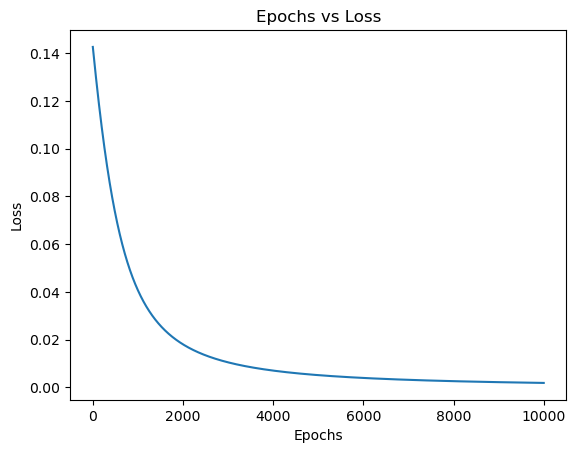

In [21]:
# 손실함수 그래프
import matplotlib.pyplot

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(epochs_loss)
matplotlib.pyplot.title("Epochs vs Loss")
matplotlib.pyplot.xlabel("Epochs")
matplotlib.pyplot.ylabel("Loss")